In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [3]:
train_data = pd.read_csv('data/train_dataset.csv')
test_data = pd.read_csv('data/test_dataset.csv')

In [4]:
train_data.head()

,UserID,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,TotalGrade
0,346,F,Jordan,Jordan,lowerlevel,G-02,B,French,S,NaN,24.0,97,15,14,No,Good,Under-7,H
1,150,M,SaudiArabia,SaudiArabia,HighSchool,G-11,A,Quran,S,Father,NaN,80,51,59,Yes,Good,Under-7,H
2,314,F,Jordan,lebanon,lowerlevel,G-04,B,Science,F,Mum,78.0,88,74,83,Yes,Good,Under-7,H
3,306,M,Jordan,Jordan,lowerlevel,G-04,B,Science,F,NaN,65.0,59,74,83,Yes,Good,Under-7,H
4,191,M,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,S,Father,15.0,25,37,13,Yes,Good,Above-7,L


In [5]:
train_data.shape

(384, 18)

In [6]:
train_data.columns

Index(['UserID', 'Gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'TotalGrade'],
      dtype='object')

In [7]:
train_data.describe()

,UserID,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,384.000000,297.000000,384.000000,384.000000,384.000000
mean,238.744792,47.363636,55.734375,38.117188,43.250000
std,136.831193,30.775052,32.860609,26.482258,27.341473
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,121.750000,17.000000,20.000000,14.000000,20.000000
50%,238.500000,50.000000,69.000000,33.500000,39.000000
75%,356.250000,75.000000,85.250000,58.000000,70.000000
max,479.000000,100.000000,99.000000,98.000000,98.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID                    384 non-null    int64  
 1   Gender                    384 non-null    object 
 2   NationalITy               384 non-null    object 
 3   PlaceofBirth              384 non-null    object 
 4   StageID                   384 non-null    object 
 5   GradeID                   384 non-null    object 
 6   SectionID                 384 non-null    object 
 7   Topic                     384 non-null    object 
 8   Semester                  384 non-null    object 
 9   Relation                  264 non-null    object 
 10  raisedhands               297 non-null    float64
 11  VisITedResources          384 non-null    int64  
 12  AnnouncementsView         384 non-null    int64  
 13  Discussion                384 non-null    int64  
 14  ParentAnsw

In [9]:
train_data.isna().sum()

UserID                        0
Gender                        0
NationalITy                   0
PlaceofBirth                  0
StageID                       0
GradeID                       0
SectionID                     0
Topic                         0
Semester                      0
Relation                    120
raisedhands                  87
VisITedResources              0
AnnouncementsView             0
Discussion                    0
ParentAnsweringSurvey         0
ParentschoolSatisfaction      0
StudentAbsenceDays           25
TotalGrade                    0
dtype: int64

In [10]:
test_data.isna().sum()

UserID                       0
Gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                        0
Semester                     0
Relation                    25
raisedhands                 21
VisITedResources             0
AnnouncementsView            0
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     0
StudentAbsenceDays           7
dtype: int64

In [11]:
test_data

,UserID,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,406,M,Jordan,Jordan,MiddleSchool,G-07,A,Biology,F,Mum,2.0,9,10,1,No,Bad,Above-7
1,426,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,NaN,80,62,11,Yes,Good,Above-7
2,348,M,Lybia,Lybia,lowerlevel,G-02,B,French,F,Mum,20.0,3,9,3,No,Good,Above-7
3,316,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Mum,60.0,92,83,23,Yes,Good,Under-7
4,293,F,Palestine,Palestine,lowerlevel,G-04,A,Science,S,Mum,62.0,64,72,84,Yes,Good,Under-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,395,M,Jordan,Palestine,MiddleSchool,G-07,A,Biology,S,NaN,70.0,98,54,72,Yes,Good,Under-7
92,326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,NaN,10.0,15,10,21,No,Bad,Above-7
93,128,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,12.0,10,20,16,No,Bad,Under-7
94,427,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,NaN,81.0,82,69,13,Yes,Good,Above-7


In [13]:
train_data[train_data['Gender'] == 'F'].describe()

,UserID,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,141.000000,104.000000,141.000000,141.000000,141.000000
mean,257.680851,52.423077,64.354610,39.695035,47.191489
std,139.343477,30.322119,30.172867,25.924325,28.873595
min,5.000000,0.000000,0.000000,0.000000,2.000000
25%,130.000000,24.750000,42.000000,19.000000,21.000000
50%,282.000000,60.000000,79.000000,37.000000,43.000000
75%,369.000000,79.250000,88.000000,57.000000,74.000000
max,479.000000,100.000000,99.000000,98.000000,98.000000


In [14]:
train_data[train_data['Gender'] == 'M'].describe()

,UserID,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,243.000000,193.000000,243.000000,243.000000,243.000000
mean,227.757202,44.637306,50.732510,37.201646,40.962963
std,134.419515,30.749713,33.374757,26.811025,26.201434
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,114.500000,15.000000,15.000000,12.000000,19.500000
50%,220.000000,40.000000,60.000000,33.000000,35.000000
75%,346.000000,73.000000,82.000000,58.000000,61.000000
max,473.000000,100.000000,98.000000,98.000000,98.000000


In [15]:
train_data[train_data['StudentAbsenceDays'] == 'Above-7']['TotalGrade']

4      L
5      M
9      L
10     L
13     M
      ..
366    L
370    L
372    M
373    L
378    H
Name: TotalGrade, Length: 138, dtype: object

In [16]:
mapping_stage_ids = {'lowerlevel': 1,'HighSchool': 2,'MiddleSchool': 3}
mapping_genders = {'F': 0,'M': 1}
mapping_sections = {'A': 1,'B': 2,'C': 3}

def get_clean_data(data):
  data.StageID = [mapping_stage_ids.get(item) for item in data.StageID]
  data.Gender = [mapping_genders.get(item) for item in data.Gender]
  data.SectionID = [mapping_sections.get(item) for item in data.SectionID]

  data.Relation[data.Relation == 'Father'] = 1
  data.Relation[data.Relation == 'Mum'] = 2

  data.Semester[data.Semester == 'S'] = 0
  data.Semester[data.Semester == 'F'] = 1

  data.ParentAnsweringSurvey[data.ParentAnsweringSurvey == 'No'] = 0
  data.ParentAnsweringSurvey[data.ParentAnsweringSurvey == 'Yes'] = 1

  data.StudentAbsenceDays[data.StudentAbsenceDays == 'Under-7'] = 0
  data.StudentAbsenceDays[data.StudentAbsenceDays == 'Above-7'] = 1

  data.ParentschoolSatisfaction[data.ParentschoolSatisfaction == 'Bad'] = 0
  data.ParentschoolSatisfaction[data.ParentschoolSatisfaction == 'Good'] = 1
  return data

In [17]:
mapping_grades = {'H': 1,'M': 2,'L': 3}
train_data.TotalGrade = [mapping_grades.get(item) for item in train_data.TotalGrade]
train_data = get_clean_data(train_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is tryi

In [18]:
train_data.head()

,UserID,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,TotalGrade
0,346,0,Jordan,Jordan,1,G-02,2,French,0,NaN,24.0,97,15,14,0,1,0,1
1,150,1,SaudiArabia,SaudiArabia,2,G-11,1,Quran,0,1,NaN,80,51,59,1,1,0,1
2,314,0,Jordan,lebanon,1,G-04,2,Science,1,2,78.0,88,74,83,1,1,0,1
3,306,1,Jordan,Jordan,1,G-04,2,Science,1,NaN,65.0,59,74,83,1,1,0,1
4,191,1,KW,KuwaIT,3,G-08,1,Arabic,0,1,15.0,25,37,13,1,1,1,3


In [19]:
train_data = train_data.fillna(0)

In [20]:
train_data1 = train_data.drop(['UserID'], axis=1)
train_data1.head(10)

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,TotalGrade
0,0,Jordan,Jordan,1,G-02,2,French,0,0,24.0,97,15,14,0,1,0,1
1,1,SaudiArabia,SaudiArabia,2,G-11,1,Quran,0,1,0.0,80,51,59,1,1,0,1
2,0,Jordan,lebanon,1,G-04,2,Science,1,2,78.0,88,74,83,1,1,0,1
3,1,Jordan,Jordan,1,G-04,2,Science,1,0,65.0,59,74,83,1,1,0,1
4,1,KW,KuwaIT,3,G-08,1,Arabic,0,1,15.0,25,37,13,1,1,1,3
5,0,Jordan,Jordan,3,G-07,1,Biology,1,2,88.0,81,50,10,1,1,1,2
6,1,Jordan,Jordan,3,G-08,1,History,1,2,87.0,92,74,89,1,1,0,1
7,1,Iraq,Iraq,3,G-07,2,Biology,0,1,89.0,92,89,83,1,1,0,1
8,0,USA,USA,2,G-12,1,IT,1,0,70.0,69,35,30,1,1,0,1
9,1,Lybia,Lybia,1,G-02,2,French,0,2,15.0,4,12,7,0,1,1,3


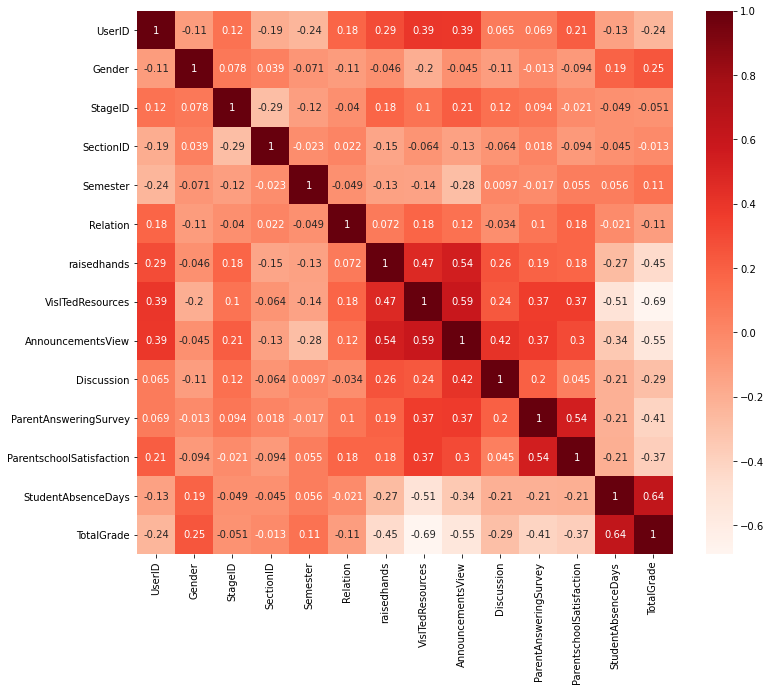

In [21]:
corr = train_data.corr()
plt.pyplot.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.pyplot.show()

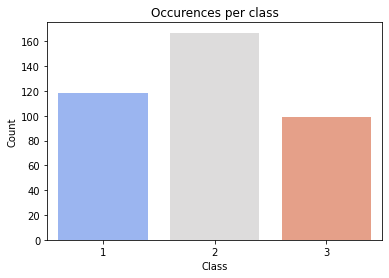

In [22]:
counts = sns.countplot(x='TotalGrade', data=train_data, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.pyplot.show()

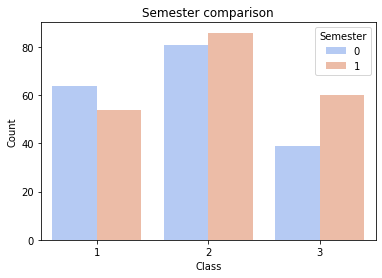

In [23]:
sem = sns.countplot(x='TotalGrade', hue='Semester', order=[1, 2, 3], data=train_data, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.pyplot.show()

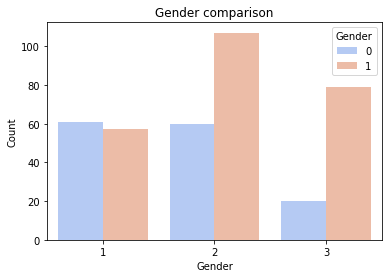

In [24]:
sem = sns.countplot(x='TotalGrade', hue='Gender', order=[1, 2, 3], data=train_data, palette='coolwarm')
sem.set(xlabel='Gender', ylabel='Count', title='Gender comparison')
plt.pyplot.show()

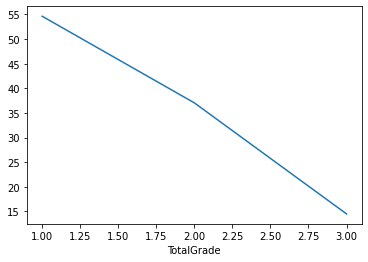

In [25]:
train_data.groupby('TotalGrade').mean()['raisedhands'].plot()

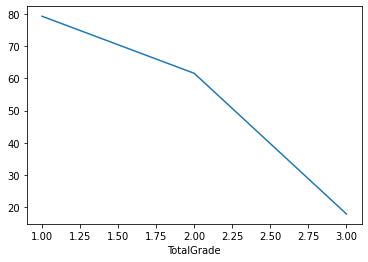

In [26]:
train_data.groupby('TotalGrade').mean()['VisITedResources'].plot()

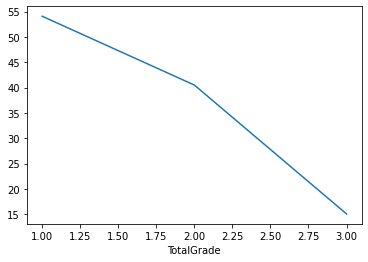

In [27]:
train_data.groupby('TotalGrade').mean()['AnnouncementsView'].plot()

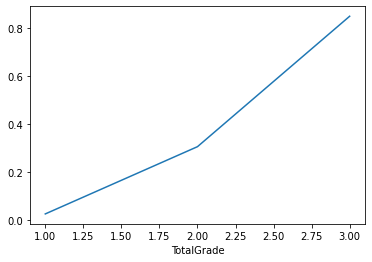

In [28]:
train_data.groupby('TotalGrade').mean()['StudentAbsenceDays'].plot()

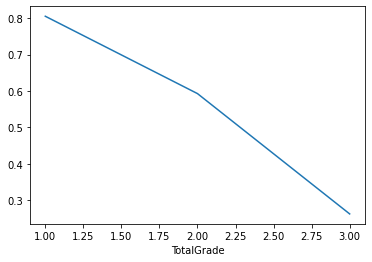

In [29]:
train_data.groupby('TotalGrade').mean()['ParentAnsweringSurvey'].plot()

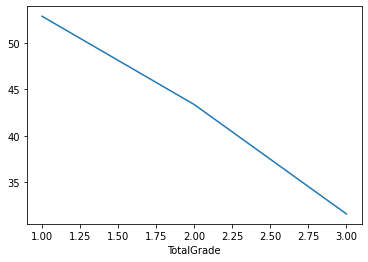

In [30]:
train_data.groupby('TotalGrade').mean()['Discussion'].plot()

In [31]:
fig = px.histogram(train_data, x='raisedhands')
fig.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = train_data.TotalGrade
X = train_data[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'StudentAbsenceDays']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [33]:
logreg = LogisticRegression(C=1e5)
logistic_regression = logreg.fit(X_train, y_train)
predicition_lr = logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [34]:
logistic_regression.score(X_test, y_test)

0.7291666666666666

In [35]:
from sklearn import svm

from sklearn.metrics import recall_score

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [36]:
linear_pred = linear.predict(X_test)

In [37]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_lin

0.7083333333333334

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
decision_tree_model.score(X_test, y_test)

0.59375

In [80]:
# Adding additional fields
X = train_data[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'StudentAbsenceDays', 'Gender', 'ParentAnsweringSurvey', 'Discussion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)

In [41]:
logreg = LogisticRegression(C=1e5)
logistic_regression = logreg.fit(X_train, y_train)
predicition_lr = logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [42]:
logistic_regression.score(X_test, y_test)

0.8020833333333334

In [43]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [44]:
linear_pred = linear.predict(X_test)

In [45]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_lin

0.7291666666666666

In [86]:
from sklearn.metrics import classification_report

print(classification_report(predicition_lr, y_test))

              precision    recall  f1-score   support

           1       0.88      0.68      0.76        31
           2       0.70      0.87      0.78        38
           3       0.92      0.85      0.88        27

    accuracy                           0.80        96
   macro avg       0.83      0.80      0.81        96
weighted avg       0.82      0.80      0.80        96



In [46]:
clean_test_data = get_clean_data(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is tryi

In [47]:
clean_test_data.head()

,UserID,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,406,1,Jordan,Jordan,3,G-07,1,Biology,1,2,2.0,9,10,1,0,0,1
1,426,1,Jordan,Jordan,3,G-08,1,Chemistry,1,2,NaN,80,62,11,1,1,1
2,348,1,Lybia,Lybia,1,G-02,2,French,1,2,20.0,3,9,3,0,1,1
3,316,1,Jordan,Jordan,1,G-02,1,French,1,2,60.0,92,83,23,1,1,0
4,293,0,Palestine,Palestine,1,G-04,1,Science,0,2,62.0,64,72,84,1,1,0


In [48]:
selected_test_data = clean_test_data[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'StudentAbsenceDays', 'Gender', 'ParentAnsweringSurvey', 'Discussion']]

In [49]:
selected_test_data

,raisedhands,VisITedResources,AnnouncementsView,StudentAbsenceDays,Gender,ParentAnsweringSurvey,Discussion
0,2.0,9,10,1,1,0,1
1,NaN,80,62,1,1,1,11
2,20.0,3,9,1,1,0,3
3,60.0,92,83,0,1,1,23
4,62.0,64,72,0,0,1,84
...,...,...,...,...,...,...,...
91,70.0,98,54,0,1,1,72
92,10.0,15,10,1,1,0,21
93,12.0,10,20,0,1,0,16
94,81.0,82,69,1,1,1,13


In [59]:
selected_test_data = selected_test_data.fillna(0)

In [64]:
predictions = logistic_regression.predict(selected_test_data)

In [67]:
mapping_grades = {1: 'H', 2: 'M', 3: 'L'}
result = [mapping_grades.get(prediction) for prediction in predictions]

In [68]:
len(result)

96

In [69]:
submission = pd.DataFrame({'UserID': test_data['UserID'], 'TotalGrade': result})
submission.head()

,UserID,TotalGrade
0,406,L
1,426,M
2,348,L
3,316,H
4,293,H


In [70]:
submission

,UserID,TotalGrade
0,406,L
1,426,M
2,348,L
3,316,H
4,293,H
...,...,...
91,395,H
92,326,L
93,128,L
94,427,M


In [71]:
sorted_submission = submission.sort_values(["UserID"], ascending=False)
sorted_submission.head()

,UserID,TotalGrade
38,477,M
42,471,H
54,470,H
8,467,H
76,463,M


In [72]:
sorted_submission

,UserID,TotalGrade
38,477,M
42,471,H
54,470,H
8,467,H
76,463,M
...,...,...
75,18,M
11,15,M
87,14,M
60,8,M


In [73]:
sorted_submission.to_csv('predictions.csv', index=False)